<a href="https://colab.research.google.com/github/HedersonSantos/RegDatChallg/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [65]:
#obtendo os arquivos de dados
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv

--2022-03-26 18:50:09--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1397869 (1.3M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]   1.33M  --.-KB/s    in 0.06s   

2022-03-26 18:50:10 (20.8 MB/s) - ‘train.csv.1’ saved [1397869/1397869]

--2022-03-26 18:50:10--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 573899 (560K) [text

In [66]:
dfTrain = pd.read_csv('train.csv')
#dfTest = pd.read_csv('test.csv')
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4141 non-null   int64  
 1   score   4141 non-null   float64
 2   V3      4141 non-null   float64
 3   V4      4141 non-null   float64
 4   V5      4141 non-null   float64
 5   V6      4141 non-null   float64
 6   V7      4141 non-null   float64
 7   V8      4141 non-null   float64
 8   V9      4141 non-null   float64
 9   V10     4141 non-null   float64
 10  V11     4141 non-null   float64
 11  V12     4141 non-null   float64
 12  V13     4141 non-null   float64
 13  V14     4141 non-null   float64
 14  V15     4141 non-null   float64
 15  V16     4141 non-null   float64
 16  V17     4141 non-null   float64
 17  V18     4141 non-null   float64
 18  V19     4141 non-null   float64
 19  V20     4141 non-null   float64
 20  V21     4141 non-null   float64
 21  V22     4141 non-null   float64
 22  

In [67]:
preditoras = ['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29']
X = dfTrain[preditoras].values
y = dfTrain['score'].values
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# feature selection
def select_features(X_treino, y_treino, X_teste):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from treinoing data
	fs.fit(X_treino, y_treino)
	# transform treino input data
	X_treino_fs = fs.transform(X_treino)
	# transform teste input data
	X_teste_fs = fs.transform(X_teste)
	return X_treino_fs, X_teste_fs, fs


Feature 0: 0.065710
Feature 1: 0.099992
Feature 2: 0.068212
Feature 3: 0.057044
Feature 4: 0.068360
Feature 5: 0.112910
Feature 6: 0.090879
Feature 7: 0.096064
Feature 8: 0.109232
Feature 9: 0.112934
Feature 10: 0.096238
Feature 11: 0.079665
Feature 12: 0.108782
Feature 13: 0.093947
Feature 14: 0.213526
Feature 15: 0.086393
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.016810
Feature 21: 0.002378
Feature 22: 0.000000
Feature 23: 0.013999
Feature 24: 0.000850
Feature 25: 0.015938
Feature 26: 0.000000


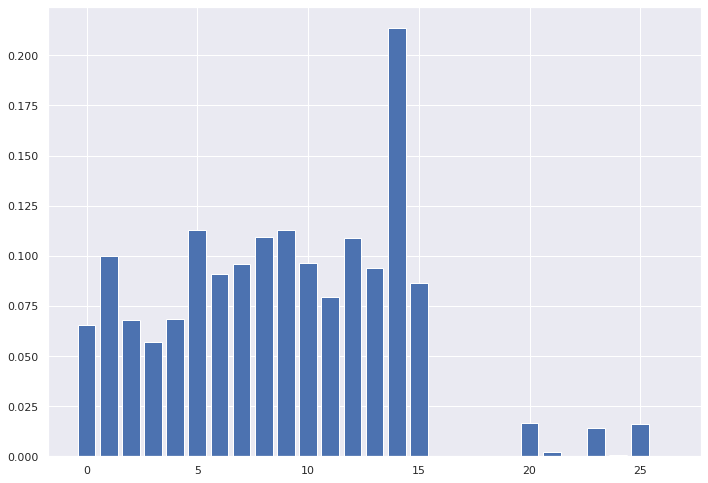

In [69]:
# feature selection
X_treino_fs, X_teste_fs, fs = select_features(X_treino, y_treino, X_teste)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


In [81]:
#np.argmax(fs.scores_)
importantes = np.argpartition(fs.scores_, -4)[-15:]
n_preditoras = [preditoras[i]  for i in importantes if preditoras[i] not in ['V8','V13','V10','V9']]
#X = dfTrain[n_preditoras].values



In [87]:
def imprimeBoxPlot(dfTrain, n_preditoras, title=None):
  if title==None: title='Box Plot'
  fig, ax =plt.subplots(5,3, figsize=(12, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3==0) & (i!=0) else j+1
    k=i%3
    data = dfTrain[[c]]
    sns.boxplot(data=data, orient='h', ax=ax[j,k]).set_title(c + " - " + title)

def imprimeScatter(dados, n_preditoras, title=None):
  if title==None: title=' '
  fig, ax =plt.subplots(2,3, figsize=(20, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j = j if (i%3==0) & (i!=0) else j+1
    k=i%3
    sns.scatterplot(data=dados, x='score', y=c, ax=ax[j,k]).set_title(c + " - " + title)


In [88]:
#filtrando outliers
dados = dfTrain.copy()
for c in n_preditoras:
  # selecionando segundo o total
  Q1 = dados[c].quantile(0.25)
  Q3 = dados[c].quantile(0.75)
  IQR = Q3 - Q1
  dados = dados[(dados[c] >= Q1 - (IQR*1.5)) & (dados[c] <= Q3 + (IQR*1.5))]
  

In [89]:
#correlação
display(dados[n_preditoras].corr('pearson'))
display(dados[n_preditoras].corr('spearman'))

,V3,V16,V18,V5,V14,V7,V4,V15,V11,V12,V17
V3,1.000000,0.391039,0.761451,0.925238,0.668693,0.925258,0.841927,-0.630342,0.459067,0.480667,0.430873
V16,0.391039,1.000000,0.415454,0.274890,0.451767,0.274831,0.531385,-0.543436,0.316502,0.368144,0.136705
V18,0.761451,0.415454,1.000000,0.637082,0.565554,0.637116,0.696139,-0.636253,0.460422,0.522120,0.394542
V5,0.925238,0.274890,0.637082,1.000000,0.599468,0.999995,0.708529,-0.583989,0.445769,0.414672,0.403009
V14,0.668693,0.451767,0.565554,0.599468,1.000000,0.599428,0.591157,-0.618901,0.471634,0.455423,0.050994
V7,0.925258,0.274831,0.637116,0.999995,0.599428,1.000000,0.708547,-0.583962,0.445734,0.414648,0.403078
V4,0.841927,0.531385,0.696139,0.708529,0.591157,0.708547,1.000000,-0.634251,0.442760,0.476018,0.478986
V15,-0.630342,-0.543436,-0.636253,-0.583989,-0.618901,-0.583962,-0.634251,1.000000,-0.695128,-0.683982,-0.335864
V11,0.459067,0.316502,0.460422,0.445769,0.471634,0.445734,0.442760,-0.695128,1.000000,0.933433,0.235990
V12,0.480667,0.368144,0.522120,0.414672,0.455423,0.414648,0.476018,-0.683982,0.933433,1.000000,0.258797


,V3,V16,V18,V5,V14,V7,V4,V15,V11,V12,V17
V3,1.000000,0.392905,0.772444,0.930293,0.722765,0.930291,0.851705,-0.663632,0.509191,0.522597,0.420603
V16,0.392905,1.000000,0.413541,0.271839,0.470208,0.271771,0.538252,-0.540436,0.316438,0.384386,0.139243
V18,0.772444,0.413541,1.000000,0.670437,0.610336,0.670453,0.706565,-0.653450,0.503602,0.557627,0.382435
V5,0.930293,0.271839,0.670437,1.000000,0.640919,0.999993,0.725549,-0.624851,0.508696,0.474309,0.412058
V14,0.722765,0.470208,0.610336,0.640919,1.000000,0.640865,0.640336,-0.647065,0.490273,0.487933,0.072430
V7,0.930291,0.271771,0.670453,0.999993,0.640865,1.000000,0.725538,-0.624812,0.508708,0.474325,0.412100
V4,0.851705,0.538252,0.706565,0.725549,0.640336,0.725538,1.000000,-0.666855,0.490891,0.529912,0.490353
V15,-0.663632,-0.540436,-0.653450,-0.624851,-0.647065,-0.624812,-0.666855,1.000000,-0.718125,-0.713265,-0.331655
V11,0.509191,0.316438,0.503602,0.508696,0.490273,0.508708,0.490891,-0.718125,1.000000,0.944484,0.252860
V12,0.522597,0.384386,0.557627,0.474309,0.487933,0.474325,0.529912,-0.713265,0.944484,1.000000,0.270185


In [91]:
dados_corr = dados[n_preditoras].corr('pearson')
for c in dados_corr.columns:
  res = dados[dados[c]>=0.9]

In [99]:
retirar=[]
c='V3'
res = dados_corr[dados_corr[c]>=0.9]
[i for i in res.index.to_list() if i!=c]
retirar.append(c)

['V5', 'V7']

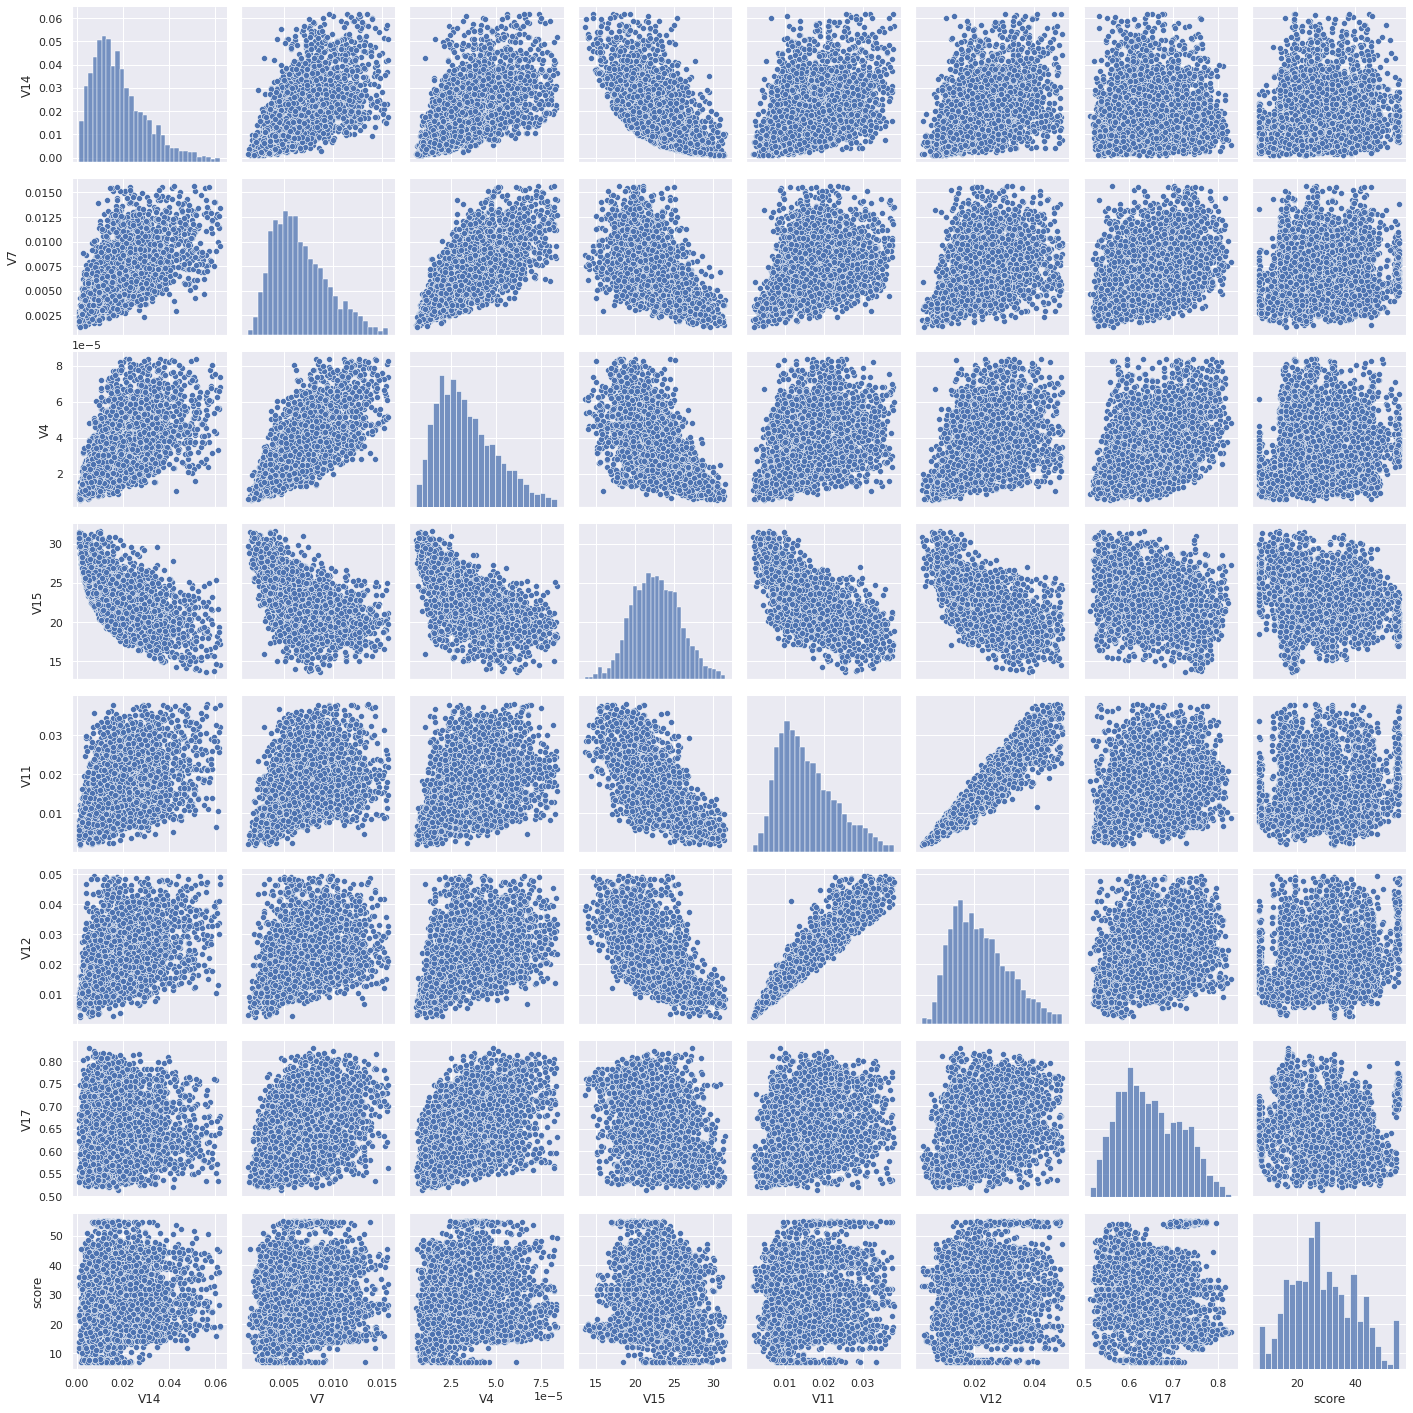

In [74]:
sns.pairplot(dados[(','.join(n_preditoras) + ',score').split(',')])
plt.show()

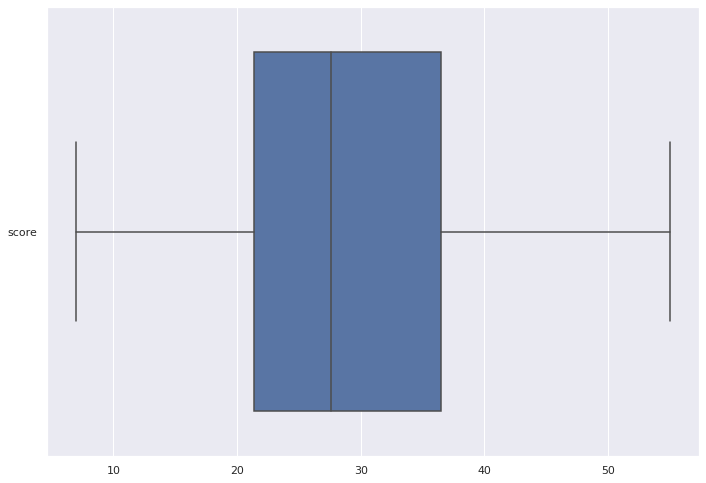

In [75]:
sns.boxplot(data=dfTrain[['score']], orient='h')


IndexError: ignored

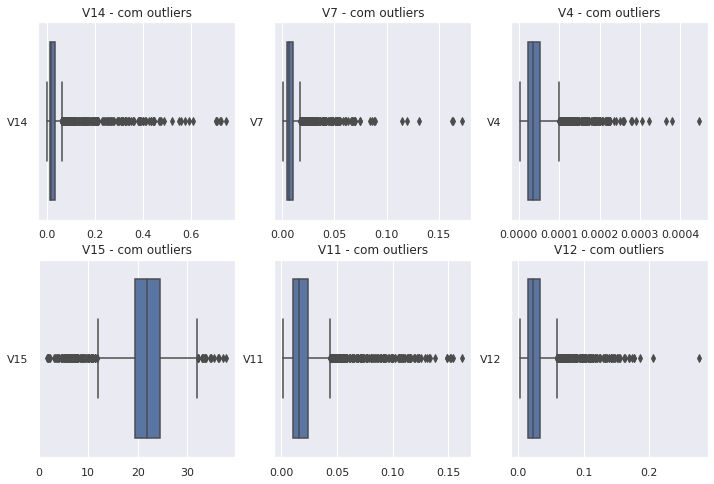

In [76]:
#box plot antes dos outliers
imprimeBoxPlot(dfTrain, n_preditoras, 'com outliers')
#box plot sem os outliers
imprimeBoxPlot(dados, n_preditoras, 'sem outliers')

In [77]:
n_preditoras

['V14', 'V7', 'V4', 'V15', 'V11', 'V12', 'V17']

In [ ]:
#for c in n_preditoras:
#  dados[c] = dados[c].map(lambda x: np.log(x))

In [ ]:
from sklearn.decomposition import PCA
###########
# projecting data in 2D
###########
X = dados[n_preditoras]
pca_proj=PCA(n_components=2)
data_2d=pca_proj.fit_transform(X)
print(data_2d.shape)

plt.scatter(data_2d[:,0],data_2d[:,1])


In [ ]:
X = dados[n_preditoras]
y = dados['score']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [ ]:
dados_t = pd.DataFrame(X_treino, columns=n_preditoras)
dados_t['score'] = y_treino

In [ ]:
#Ajusta o modelo de regressão linear múltipla para o score

modelo = ols('score ~ ' + ' + '.join(n_preditoras) ,data=dados_t)

res = modelo.fit()
print(res.summary())

In [ ]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#scaled_features = StandardScaler().fit_transform(dados)
#scaled_features = MinMaxScaler().fit_transform(dados)
#dados = pd.DataFrame(scaled_features, columns=dados.columns)

In [ ]:
modelo = ols('score ~ ' + ' + '.join(n_preditoras) ,data=dados)

res = modelo.fit()
print(res.summary())
